# Problem 3

In [2]:
import numpy as np
import pandas as pd
# generate the first 2-d Gaussian distribution
x1=np.random.normal(0,4,10000)
y1=np.random.normal(0,4,10000)
z1=np.repeat(1,10000)
p1=pd.DataFrame({'x':x1,'y':y1,'z':z1})

# generate the second 2-d Gaussian distribution
x2=np.random.normal(10,4,10000)
y2=np.random.normal(10,4,10000)
z2=np.repeat(-1,10000)
p2=pd.DataFrame({'x':x2,'y':y2,'z':z2})

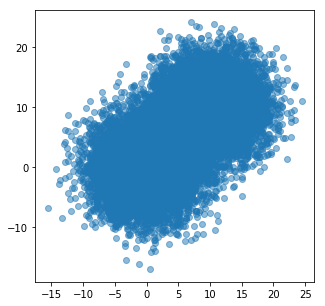

In [99]:
# combine the datasets p1 and p2
import matplotlib.pyplot as plt
%matplotlib inline
p=pd.concat([p1,p2], axis=0,ignore_index=True)
p=pd.DataFrame(p)
fig = plt.figure(figsize=(5, 5))
plt.scatter(p['x'], p['y'], alpha=0.5)

In [4]:
print(p)

               x          y  z
0       3.462377  -1.362007  1
1       4.490502  -6.099760  1
2      -3.573295   3.485086  1
3       1.163639   0.578138  1
4       4.262089  -2.669447  1
5       4.541785  -3.628117  1
6       1.645016   2.312090  1
7       0.065489   2.990848  1
8       3.591716   2.603631  1
9       2.993631  -0.540569  1
10      0.264233   3.061080  1
11      4.417018  -3.289168  1
12     -8.182936   6.754235  1
13     -2.689750   7.429158  1
14     -6.856903   2.635375  1
15     -0.856052  -7.344789  1
16     -3.762184   2.560988  1
17     -3.542190   0.159728  1
18     -6.247320  -4.171262  1
19     -2.688980   3.484346  1
20     -2.909734  -1.292791  1
21      5.876404   3.121710  1
22      1.131021   1.876194  1
23     -7.835466  -0.014375  1
24     -1.166413  -3.075780  1
25      3.747838   0.871474  1
26     -4.517641   1.396267  1
27     -0.293707  -1.575286  1
28      3.709542   6.602353  1
29     -5.402277   5.183866  1
...          ...        ... ..
19970  1

In [5]:
X_dist=p[['x','y']]
X_dist=np.array(X_dist)
print(X_dist)

[[  3.46237732  -1.36200745]
 [  4.49050231  -6.09975957]
 [ -3.57329544   3.48508593]
 ..., 
 [ 12.89728027  19.91360637]
 [  5.44807601  10.29060905]
 [ 12.10029654   9.07223657]]


In [6]:
from scipy.spatial import distance as dist
Y=dist.cdist(X_dist,X_dist,'euclidean')

In [7]:
Y=pd.DataFrame(Y)
print(Y)

           0          1          2          3          4          5      \
0       0.000000   4.848024   8.543711   3.008050   1.532624   2.510055   
1       4.848024   0.000000  12.525737   7.460720   3.437909   2.472174   
2       8.543711  12.525737   0.000000   5.557778   9.963509  10.791302   
3       3.008050   7.460720   5.557778   0.000000   4.488563   5.394855   
4       1.532624   3.437909   9.963509   4.488563   0.000000   0.998639   
5       2.510055   2.472174  10.791302   5.394855   0.998639   0.000000   
6       4.098999   8.880091   5.348523   1.799532   5.627146   6.608883   
7       5.521431  10.110385   3.672196   2.650868   7.046303   7.990490   
8       3.967747   8.749676   7.219027   3.161990   5.315520   6.303754   
9       0.945772   5.757189   7.702624   2.144849   2.478126   3.453945   
10      5.458190  10.088723   3.860881   2.640821   6.987259   7.939951   
11      2.150648   2.811552  10.475477   5.053764   0.638794   0.361183   
12     14.194602  18.0510

In [39]:
## Calculate ri for each data points based on Silverman's Rule (c=0.5, k=10)
from heapq import nsmallest
r_list=[]
for i in range(0,len(Y)):
    tem=np.array(Y[[i]])
    r=(0.5/10)*sum(nsmallest(10, tem))
    r_list.append(r)
print(r_list)

[array([ 0.08014159]), array([ 0.15853569]), array([ 0.08506522]), array([ 0.05837845]), array([ 0.1027853]), array([ 0.08314375]), array([ 0.05279948]), array([ 0.05688143]), array([ 0.05149722]), array([ 0.06200985]), array([ 0.04437237]), array([ 0.09136505]), array([ 0.26868372]), array([ 0.09099986]), array([ 0.11992951]), array([ 0.12104043]), array([ 0.06901175]), array([ 0.07080247]), array([ 0.11572457]), array([ 0.05443715]), array([ 0.06281763]), array([ 0.06287483]), array([ 0.05477675]), array([ 0.13671695]), array([ 0.06520847]), array([ 0.08372879]), array([ 0.07966142]), array([ 0.05973082]), array([ 0.08073028]), array([ 0.1442068]), array([ 0.06970788]), array([ 0.28058267]), array([ 0.05168486]), array([ 0.06546628]), array([ 0.06788105]), array([ 0.08954812]), array([ 0.06624204]), array([ 0.06252687]), array([ 0.06130284]), array([ 0.05782723]), array([ 0.0710183]), array([ 0.05529306]), array([ 0.07962149]), array([ 0.08535867]), array([ 0.05996149]), array([ 0.05

In [47]:
r=np.array(r_list).reshape((1,20000))
print(r)

[[ 0.08014159  0.15853569  0.08506522 ...,  0.18506759  0.04997309
   0.0832151 ]]


In [51]:
r_matrix=np.repeat(r,20000,axis=0)
print(r_matrix)

[[ 0.08014159  0.15853569  0.08506522 ...,  0.18506759  0.04997309
   0.0832151 ]
 [ 0.08014159  0.15853569  0.08506522 ...,  0.18506759  0.04997309
   0.0832151 ]
 [ 0.08014159  0.15853569  0.08506522 ...,  0.18506759  0.04997309
   0.0832151 ]
 ..., 
 [ 0.08014159  0.15853569  0.08506522 ...,  0.18506759  0.04997309
   0.0832151 ]
 [ 0.08014159  0.15853569  0.08506522 ...,  0.18506759  0.04997309
   0.0832151 ]
 [ 0.08014159  0.15853569  0.08506522 ...,  0.18506759  0.04997309
   0.0832151 ]]


In [54]:
r_matrix=pd.DataFrame(r_matrix)
r_matrix.shape

(20000, 20000)

In [55]:
x_k=np.divide(Y,r_matrix)

In [56]:
print(x_k)

            0           1           2           3           4           5      \
0        0.000000   30.580016  100.437187   51.526718   14.910923   30.189335   
1       60.493232    0.000000  147.248632  127.799216   33.447481   29.733737   
2      106.607707   79.008943    0.000000   95.202562   96.935160  129.790889   
3       37.534190   47.060189   65.335487    0.000000   43.669309   64.885867   
4       19.123948   21.685396  117.127881   76.887331    0.000000   12.010990   
5       31.320249   15.593804  126.859152   92.411754    9.715775    0.000000   
6       51.146966   56.013195   62.875553   30.825278   54.746609   79.487426   
7       68.895949   63.773559   43.169179   45.408339   68.553608   96.104511   
8       49.509215   55.190575   84.864612   54.163657   51.714787   75.817534   
9       11.801264   36.314783   90.549626   36.740419   24.109728   41.541848   
10      68.106826   63.636922   45.387309   45.236227   67.979169   95.496658   
11      26.835602   17.73450

In [57]:
x_k=np.array(x_k)

In [58]:
h=(1.0 / np.sqrt(2 * np.pi)) * np.exp(- 0.5 * x_k*x_k)

In [59]:
h.shape

(20000, 20000)

In [74]:
print(h)

[[  3.98942280e-001   3.45469262e-204   0.00000000e+000 ...,
    0.00000000e+000   0.00000000e+000   0.00000000e+000]
 [  0.00000000e+000   3.98942280e-001   0.00000000e+000 ...,
    0.00000000e+000   0.00000000e+000   0.00000000e+000]
 [  0.00000000e+000   0.00000000e+000   3.98942280e-001 ...,
    0.00000000e+000   0.00000000e+000   0.00000000e+000]
 ..., 
 [  0.00000000e+000   0.00000000e+000   0.00000000e+000 ...,
    3.98942280e-001   0.00000000e+000   0.00000000e+000]
 [  0.00000000e+000   0.00000000e+000   0.00000000e+000 ...,
    0.00000000e+000   3.98942280e-001   0.00000000e+000]
 [  0.00000000e+000   0.00000000e+000   0.00000000e+000 ...,
    0.00000000e+000   0.00000000e+000   3.98942280e-001]]


In [60]:
f_i=h/h.sum(axis=1,keepdims=True)


In [73]:
print(f_i)

[[  4.23823980e-001   3.67015894e-204   0.00000000e+000 ...,
    0.00000000e+000   0.00000000e+000   0.00000000e+000]
 [  0.00000000e+000   5.07841839e-001   0.00000000e+000 ...,
    0.00000000e+000   0.00000000e+000   0.00000000e+000]
 [  0.00000000e+000   0.00000000e+000   3.33580796e-001 ...,
    0.00000000e+000   0.00000000e+000   0.00000000e+000]
 ..., 
 [  0.00000000e+000   0.00000000e+000   0.00000000e+000 ...,
    3.92858589e-001   0.00000000e+000   0.00000000e+000]
 [  0.00000000e+000   0.00000000e+000   0.00000000e+000 ...,
    0.00000000e+000   3.40979456e-001   0.00000000e+000]
 [  0.00000000e+000   0.00000000e+000   0.00000000e+000 ...,
    0.00000000e+000   0.00000000e+000   5.88599321e-001]]


In [66]:
y=np.array(p[['z']])

In [67]:
y.reshape((1,20000))

array([[ 1,  1,  1, ..., -1, -1, -1]])

In [68]:
y_matrix=np.repeat(y,20000,axis=1)

In [69]:
y_matrix.shape

(20000, 20000)

In [70]:
tem=f_i*y_matrix
p_i=np.sum(tem,axis=1)

In [71]:
p_i.shape

(20000,)

In [72]:
print(p_i)

[ 1.  1.  1. ..., -1. -1. -1.]


In [81]:
p_i[19000]

-1.0

In [82]:
#classifier
y_hat_list=[]
for i in range (0,len(p_i)):
    if p_i[i]>0:
        y_hat=1
    else:
        y_hat=-1
    y_hat_list.append(y_hat)

In [83]:
print(y_hat_list)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [93]:
y_hat=np.array(y_hat_list).reshape((20000,1))


In [95]:
y_hat=pd.DataFrame(y_hat)

In [96]:
print(y_hat)

       0
0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
...   ..
19970 -1
19971 -1
19972 -1
19973 -1
19974 -1
19975 -1
19976 -1
19977 -1
19978 -1
19979 -1
19980 -1
19981 -1
19982 -1
19983 -1
19984 -1
19985 -1
19986 -1
19987 -1
19988 -1
19989 -1
19990 -1
19991 -1
19992 -1
19993 -1
19994 -1
19995 -1
19996 -1
19997 -1
19998 -1
19999 -1

[20000 rows x 1 columns]


In [104]:
p_hat=pd.concat([p,y_hat], axis=1)

In [105]:
print(p_hat)

               x          y  z  0
0       3.462377  -1.362007  1  1
1       4.490502  -6.099760  1  1
2      -3.573295   3.485086  1  1
3       1.163639   0.578138  1  1
4       4.262089  -2.669447  1  1
5       4.541785  -3.628117  1  1
6       1.645016   2.312090  1  1
7       0.065489   2.990848  1  1
8       3.591716   2.603631  1  1
9       2.993631  -0.540569  1  1
10      0.264233   3.061080  1  1
11      4.417018  -3.289168  1  1
12     -8.182936   6.754235  1  1
13     -2.689750   7.429158  1  1
14     -6.856903   2.635375  1  1
15     -0.856052  -7.344789  1  1
16     -3.762184   2.560988  1  1
17     -3.542190   0.159728  1  1
18     -6.247320  -4.171262  1  1
19     -2.688980   3.484346  1  1
20     -2.909734  -1.292791  1  1
21      5.876404   3.121710  1  1
22      1.131021   1.876194  1  1
23     -7.835466  -0.014375  1  1
24     -1.166413  -3.075780  1  1
25      3.747838   0.871474  1  1
26     -4.517641   1.396267  1  1
27     -0.293707  -1.575286  1  1
28      3.7095

In [107]:
p_hat['d']=abs(p_hat[0]-p_hat['z'])

In [108]:
print(p_hat)

               x          y  z  0  d
0       3.462377  -1.362007  1  1  0
1       4.490502  -6.099760  1  1  0
2      -3.573295   3.485086  1  1  0
3       1.163639   0.578138  1  1  0
4       4.262089  -2.669447  1  1  0
5       4.541785  -3.628117  1  1  0
6       1.645016   2.312090  1  1  0
7       0.065489   2.990848  1  1  0
8       3.591716   2.603631  1  1  0
9       2.993631  -0.540569  1  1  0
10      0.264233   3.061080  1  1  0
11      4.417018  -3.289168  1  1  0
12     -8.182936   6.754235  1  1  0
13     -2.689750   7.429158  1  1  0
14     -6.856903   2.635375  1  1  0
15     -0.856052  -7.344789  1  1  0
16     -3.762184   2.560988  1  1  0
17     -3.542190   0.159728  1  1  0
18     -6.247320  -4.171262  1  1  0
19     -2.688980   3.484346  1  1  0
20     -2.909734  -1.292791  1  1  0
21      5.876404   3.121710  1  1  0
22      1.131021   1.876194  1  1  0
23     -7.835466  -0.014375  1  1  0
24     -1.166413  -3.075780  1  1  0
25      3.747838   0.871474  1  1  0
2

In [109]:
colmap = {1: 'r', -1: 'g'}
p_hat['color'] = p_hat['z'].map(lambda x: colmap[x])
p_hat['color_hat'] = p_hat[0].map(lambda x: colmap[x])

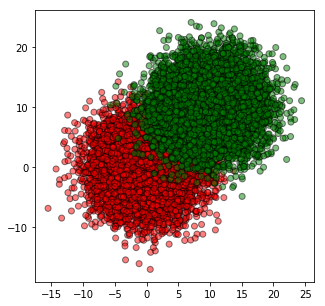

In [110]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(p_hat['x'], p_hat['y'], color=p_hat['color'], alpha=0.5, edgecolor='k')

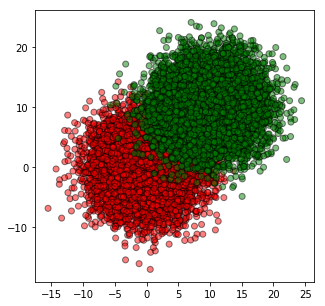

In [111]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(p_hat['x'], p_hat['y'], color=p_hat['color_hat'], alpha=0.5, edgecolor='k')

In [112]:
colmap1 = {1: 'r', 0: 'g'}
p_hat['color_diff'] = p_hat['d'].map(lambda x: colmap1[x])

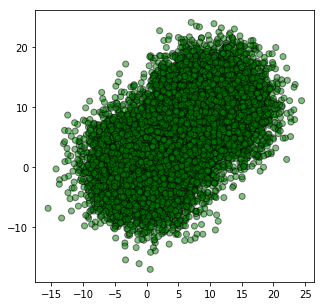

In [113]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(p_hat['x'], p_hat['y'], color=p_hat['color_diff'], alpha=0.5, edgecolor='k')